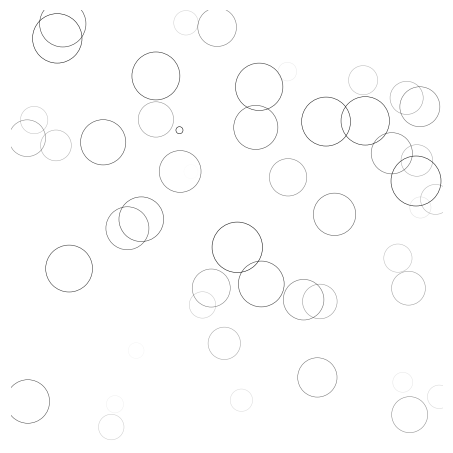

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figure, no frame and a 1:1 aspect ratio
ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50

# Ring position
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)
# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)

    # Return the modified object
    return scat,

animation = FuncAnimation(fig, update, interval=10, blit=True, frames=200)
# animation.save('rain.gif', writer='imagemagick', fps=30, dpi=40)
plt.show()


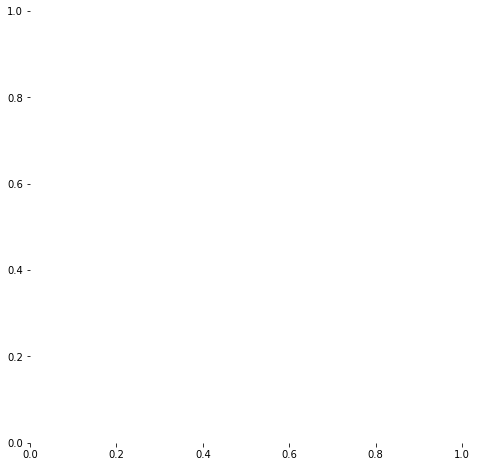

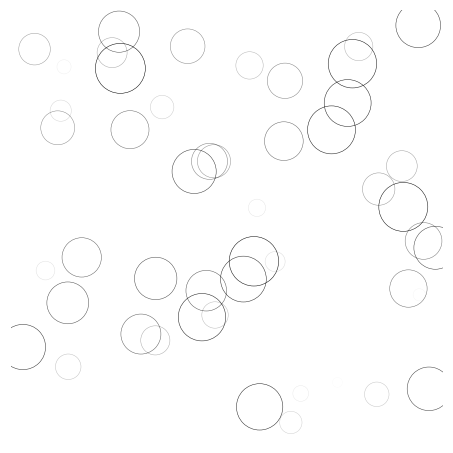

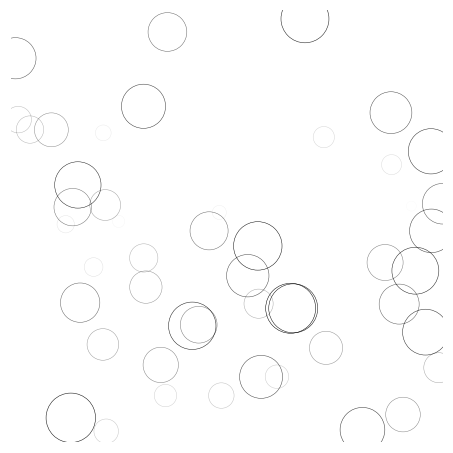

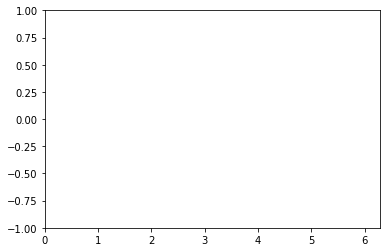

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()